In [16]:
import pandas as pd
import numpy as np
import os
from scipy.stats import pearsonr, spearmanr
import h5py

In [2]:
data = pd.read_csv('CDS-LM-2048/test_res.csv', index_col=0)
data['test_spearmanr'].mean()

np.float64(0.7515403363651003)

In [8]:
data = pd.read_csv('CDS-LM-default-clip-res.csv', index_col=0)
data['test_spearmanr'].mean()

np.float64(0.739821714808286)

In [27]:
from scipy.stats import spearmanr, pearsonr

data = pd.read_csv('sss_all_preds.csv', index_col=0)
data

,pred,y_true
0,0.484375,0.090027
1,0.269531,0.493896
2,0.753906,1.508789
3,-0.722656,-0.536133
4,-0.445312,-1.348633
...,...,...
12909,-1.679688,-1.743164
12910,-1.398438,-1.372070
12911,-1.976562,-2.175781
12912,0.194336,-1.517578


In [22]:
pearsonr(data['pred'], data['y_true'])

PearsonRResult(statistic=np.float64(0.75763472172377), pvalue=np.float64(0.0))

In [13]:
data_nosplice = pd.read_csv('CDS-LM-X-test_preds.csv', index_col=0)

In [15]:
data['pred_x'] = data_nosplice['pred']

In [19]:
data['ens_pred'] = data['pred'] * (2/3) + data['pred_x'] * (1/3)

In [20]:
spearmanr(data['ens_pred'], data['y_true'])

SignificanceResult(statistic=np.float64(0.7492354176371746), pvalue=np.float64(0.0))

In [5]:
with h5py.File('/home/jovyan/shared/toby/cds-lm/saluki_data/datasets/deeplearning/train_gru/f0_c0/test0/targets.h5', "r") as f:
    print(f.keys())
preds[:,0].shape
preds.shape

<KeysViewHDF5 ['genes', 'targets']>


NameError: name 'preds' is not defined

In [42]:
arr[0][0]

array([[0.],
       [0.],
       [0.],
       [0.]], dtype=float16)

In [168]:
with h5py.File("/home/jovyan/shared/toby/cds-lm/saluki_data/datasets/deeplearning/ISM/f0_scores.h5", "r") as f:
    print(f.keys())
    print(np.array(f['ref']))
    data = np.array(f['ism']).squeeze()[0,-3,:]

<KeysViewHDF5 ['coding', 'genes', 'ism', 'ref', 'seqs', 'splice']>
[[0.1685 ]
 [0.08484]
 [1.186  ]
 ...
 [1.113  ]
 [0.755  ]
 [0.7163 ]]


In [169]:
data.mean()

np.float16(2.4e-07)

In [6]:
root_dir = "/home/jovyan/shared/toby/cds-lm/saluki_data/datasets/deeplearning/train_gru"

all_dfs = []

for fold in range(10):
    for cross in range(5):
        folder = f"f{fold}_c{cross}/test0/"
        
        preds_path = os.path.join(root_dir, folder, "preds.h5")
        targets_path = os.path.join(root_dir, folder, "targets.h5")
        
        if not (os.path.exists(preds_path) and os.path.exists(targets_path)):
            print(f"Missing files in {folder}")
            continue
        
        # Load predictions and targets
        with h5py.File(preds_path, "r") as f:
            preds = np.squeeze(np.array(f['preds']))
            gene = np.squeeze(np.array(f['genes']))
        with h5py.File(targets_path, "r") as f:
            targets = np.squeeze(np.array(f['targets']))
        
        # Combine side by side
        df = pd.DataFrame({'gene': gene, 'preds': preds, 'targets': targets})
        
        # Add fold and cross columns
        df["fold"] = fold
        df["cross"] = cross
        
        all_dfs.append(df)

# Combine all
full_df = pd.concat(all_dfs, ignore_index=True)

In [7]:
full_df

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,gene,preds,targets,fold,cross
0,b'ENSG00000000457',0.168457,-1.437500,0,0
1,b'ENSG00000001631',0.084839,-0.184937,0,0
2,b'ENSG00000002549',1.185547,1.395508,0,0
3,b'ENSG00000003137',0.714844,-0.657227,0,0
4,b'ENSG00000003987',0.377930,0.064392,0,0
...,...,...,...,...,...
64835,b'ENSG00000273045',-0.535645,-0.976074,9,4
64836,b'ENSG00000274286',-0.708496,-0.480713,9,4
64837,b'ENSG00000275004',-2.140625,-1.830078,9,4
64838,b'ENSG00000275183',-1.353516,-1.360352,9,4


In [75]:
mean_df = full_df.groupby('gene')[['preds', 'targets']].mean()

In [76]:
mean_df

,preds,targets
gene,,
b'ENSG00000000003',1.366211,1.793945
b'ENSG00000000457',-0.166663,-1.437500
b'ENSG00000000460',0.406775,0.090027
b'ENSG00000000938',1.303125,-0.197021
b'ENSG00000000971',-0.009277,1.599609
...,...,...
b'ENSG00000278615',0.639941,0.260498
b'ENSG00000278619',-0.508740,-0.278076
b'ENSG00000278845',0.274951,0.384766


In [77]:
spearmanr(mean_df['preds'], mean_df['targets'])

SignificanceResult(statistic=np.float64(0.7641120326938552), pvalue=np.float64(0.0))

In [103]:
res_dict = {'cross': [], 'fold': [], 'rho': []}
for cross in range(5):
    for fold in range(10):
        df_copy = full_df[full_df['cross'] == cross]
        df_fold = df_copy[df_copy['fold'] == fold].copy()
        rho, _ = spearmanr(df_fold['preds'], df_fold['targets'])
        res_dict['cross'].append(cross)
        res_dict['fold'].append(fold)
        res_dict['rho'].append(rho)
per_fold_res = pd.DataFrame(res_dict)

<Axes: xlabel='preds', ylabel='targets'>

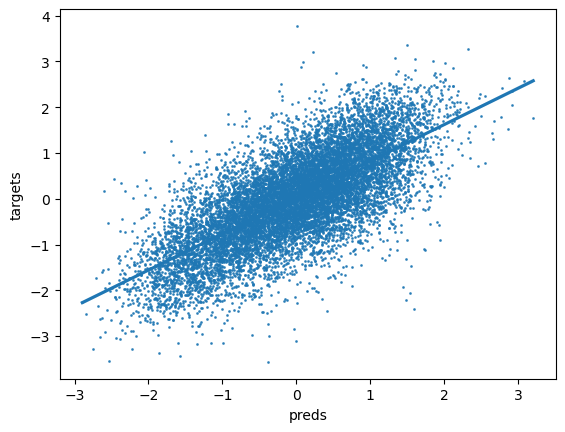

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
c0 = full_df[full_df['cross'] == 0]
sns.regplot(data = c0, x='preds', y='targets', scatter_kws={'s':1})

In [95]:
for cross in range(5):
    df_copy = full_df[full_df['cross'] == cross]
    rho, _ = spearmanr(df_copy['preds'], df_copy['targets'])
    print(rho)

0.711215501725911
0.7423736981236774
0.731475061464832
0.7398040426471512
0.7409847338571558


In [22]:
for cross in range(5):
    df_copy = per_fold_res[per_fold_res['cross'] == cross]
    print(df_copy['rho'].mean())

0.7441945675375725
0.7476958089787943
0.7488465189544417
0.7470944971342688
0.7467989657674153


In [8]:
full_df['gene'] = full_df['gene'].apply(
    lambda x: x.decode('utf-8').strip() if isinstance(x, bytes) else x
)

In [12]:
full_df.to_csv('./saluki_preds.csv')

In [28]:
data = pd.read_csv('../CDS-LM/data/finetuning/saluki/human_sss_reprocessed.csv')

In [25]:
preds = pd.read_csv('./sss_all_preds.csv', index_col=0)
preds

,pred,y_true
0,0.484375,0.090027
1,0.269531,0.493896
2,0.753906,1.508789
3,-0.722656,-0.536133
4,-0.445312,-1.348633
...,...,...
12909,-1.679688,-1.743164
12910,-1.398438,-1.372070
12911,-1.976562,-2.175781
12912,0.194336,-1.517578


In [29]:
preds['gene'] = data['Gene']
preds['fold'] = data['split']
preds['cross'] = 5

In [112]:
preds.rename(columns={'y_true': 'targets', 'pred': 'preds'}, inplace=True)

In [113]:
df_plus = pd.concat([full_df, preds])

In [114]:
df_plus

,gene,preds,targets,fold,cross
0,ENSG00000000457,0.168457,-1.437500,0,0
1,ENSG00000001631,0.084839,-0.184937,0,0
2,ENSG00000002549,1.185547,1.395508,0,0
3,ENSG00000003137,0.714844,-0.657227,0,0
4,ENSG00000003987,0.377930,0.064392,0,0
...,...,...,...,...,...
12909,ENSG00000247746,-1.679688,-1.743164,9,5
12910,ENSG00000189266,-1.398438,-1.372070,9,5
12911,ENSG00000249709,-1.976562,-2.175781,9,5
12912,ENSG00000189369,0.194336,-1.517578,9,5


In [116]:
mean_df = df_plus.groupby('gene')[['preds', 'targets']].mean()

In [117]:
spearmanr(mean_df['preds'], mean_df['targets'])

SignificanceResult(statistic=np.float64(0.7750518378576916), pvalue=np.float64(0.0))

In [36]:
saluki_mean_df = full_df.groupby('gene')[['preds', 'targets']].mean()

In [31]:
preds.set_index('gene', inplace=True)

In [175]:
new_res = pd.read_csv('./CDS-LM-sss-utr-nosplice-preds.csv', index_col=0)
new_res.index = preds.index
new_res.rename(columns={'y_true': 'targets', 'pred': 'preds'}, inplace=True)
new_res_dedup = new_res.groupby(new_res.index)[['preds', 'targets']].mean()

In [32]:
new_res = pd.read_csv('CDS-LM-2048/test_preds.csv', index_col=0)
new_res.index = preds.index
new_res.rename(columns={'y_true': 'targets', 'pred': 'preds'}, inplace=True)
new_res_dedup = new_res.groupby(new_res.index)[['preds', 'targets']].mean()

In [73]:
spearmanr(new_res_dedup['preds'], new_res_dedup['targets'])

SignificanceResult(statistic=np.float64(0.7504056579383419), pvalue=np.float64(0.0))

In [47]:
# saluki_mean_df['cds-lm-pred'] = [preds_dedup.loc[gene, 'preds'] if gene in preds_dedup.index else saluki_mean_df.loc[gene, 'preds'] for gene in saluki_mean_df.index]
# saluki_mean_df['cds-lm-somess-pred'] = [new_res_dedup.loc[gene, 'preds'] if gene in new_res_dedup.index else saluki_mean_df.loc[gene, 'preds'] for gene in saluki_mean_df.index]
saluki_mean_df['cds-lm-somess-pred'] = [new_res_dedup.loc[gene, 'preds'] if gene in new_res_dedup.index else None for gene in saluki_mean_df.index]

In [49]:
saluki_mean_df['ensemble-pred'] = saluki_mean_df[['preds', 'cds-lm-somess-pred']].mean(axis=1)

In [50]:
rho, _ = spearmanr(saluki_mean_df['ensemble-pred'], saluki_mean_df['targets'])


SignificanceResult(statistic=np.float64(0.7834587071272946), pvalue=np.float64(0.0))

In [42]:
spearmanr(saluki_mean_df['cds-lm-somess-pred'], saluki_mean_df['targets'])

SignificanceResult(statistic=np.float64(0.7498601490969218), pvalue=np.float64(0.0))

In [46]:
cds

preds                 0
targets               0
cds-lm-somess-pred    0
ensemble-pred         0
fold                  0
dtype: int64

In [144]:
preds_dedup = preds.groupby(preds.index)[['preds', 'targets']].mean()

In [45]:
saluki_mean_df['fold'] = full_df[full_df['cross'] == 0]['fold'].values

In [55]:
per_fold_res

,cross,fold,rho
0,0,0,0.739944
1,0,1,0.748122
2,0,2,0.770250
3,0,3,0.714445
4,0,4,0.754732
5,0,5,0.749226
6,0,6,0.738434
7,0,7,0.749404
8,0,8,0.727087
9,0,9,0.750301


In [76]:
cdslm_res = pd.read_csv('./CDS-LM-2048/test_res.csv', index_col=0)

In [125]:
rhos = []
cols = []
folds = []
column_list =['cds-lm-somess-pred', 'preds', 'ensemble-pred']
for fold in range(10):
    print(fold)
    fold_df = saluki_mean_df[saluki_mean_df['fold'] == fold]
    for column in column_list:
        if column.startswith('c'):
            rho = cdslm_res.loc[fold, 'test_spearmanr']
        else:
            rho, _ = spearmanr(fold_df[column], fold_df['targets'])
        rhos.append(rho)
        cols.append(column)
        folds.append(fold)

0
1
2
3
4
5
6
7
8
9


In [127]:
per_fold_cds_res = pd.DataFrame({'Model': cols, 'fold': folds, 'rho': rhos})

In [112]:
per_fold_cds_res['Model'] = per_fold_cds_res['Model']

In [128]:
per_fold_cds_res.groupby('Model')['rho'].mean()

Model
cds-lm-somess-pred    0.751540
ensemble-pred         0.777624
preds                 0.758071
Name: rho, dtype: float64

In [104]:
per_fold_res.rename({'cross': 'Model'}, inplace=True, axis=1)

In [105]:
per_fold_res['Model'] = [f'Saluki C{cross}' for cross in per_fold_res['Model']]

In [129]:
final_res = pd.concat([per_fold_res, per_fold_cds_res])

In [135]:
final_res.to_csv('./all_saluki_fold_res.csv')

In [134]:
#final_res['Model'] =
final_res['Model'].replace({'cds-lm-somess-pred':'CDS-LM', 'preds': 'Saluki Ensemble', 'ensemble-pred': 'Saluki + CDS-LM'}, inplace=True)

/tmp/ipykernel_1317/2662466716.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_res['Model'].replace({'cds-lm-somess-pred':'CDS-LM', 'preds': 'Saluki Ensemble', 'ensemble-pred': 'Saluki + CDS-LM'}, inplace=True)


In [139]:
model_list = final_res['Model'].unique().tolist()
model_list

['Saluki C0',
 'Saluki C1',
 'Saluki C2',
 'Saluki C3',
 'Saluki C4',
 'CDS-LM',
 'Saluki Ensemble',
 'Saluki + CDS-LM']

In [146]:
rho_list = []
for cross in range(5):
    df_copy = full_df[full_df['cross'] == cross]
    rho, _ = spearmanr(df_copy['preds'], df_copy['targets'])
    rho_list.append(rho)        

In [147]:
rho, _ = spearmanr(new_res_dedup['preds'], new_res_dedup['targets'])
rho_list.append(rho)
for column in ['preds', 'ensemble-pred']:
    rho, _ = spearmanr(saluki_mean_df[column], saluki_mean_df['targets'])
    rho_list.append(rho)

In [148]:
rho_list

[np.float64(0.711215501725911),
 np.float64(0.7423736981236774),
 np.float64(0.731475061464832),
 np.float64(0.7398040426471512),
 np.float64(0.7409847338571558),
 np.float64(0.7504056579383419),
 np.float64(0.7641120326938552),
 np.float64(0.7834587071272946)]

In [149]:
full_res = pd.DataFrame({'Model': model_list, 'rho': rho_list})
full_res.to_csv('all_saluki_res.csv')